In [24]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from reliability.Fitters import Fit_Weibull_2P
from fitter import Fitter
from scipy.stats import lognorm
import statsmodels.api as sm

In [2]:
df = pd.read_csv("test2.csv")

In [3]:
df

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Wind Direction Units,Wind Speed,Snow Depth Units,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Version
0,NSRDB,34082,-,-,-,14.25,77.35,5.5,0,5.5,...,Degrees,m/s,m,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,unknown
1,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,1,1,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,1,1,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,1,1,2,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8757,2014,12,31,19,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,2014,12,31,20,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8759,2014,12,31,21,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8760,2014,12,31,22,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.loc[df["Time Zone"]!='0']

In [5]:
df

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Wind Direction Units,Wind Speed,Snow Depth Units,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Version
0,NSRDB,34082,-,-,-,14.25,77.35,5.5,0,5.5,...,Degrees,m/s,m,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,unknown
1,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014,1,1,7,0,70,179,99,63,243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2014,1,1,8,0,178,124,224,127,520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2014,1,1,9,0,251,401,472,163,664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8751,2014,12,31,13,0,211,732,766,211,732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8752,2014,12,31,14,0,302,406,572,196,684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8753,2014,12,31,15,0,258,106,313,169,591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8754,2014,12,31,16,0,162,110,199,124,422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.drop(df.index[[0,1]])

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Wind Direction Units,Wind Speed,Snow Depth Units,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Version
9,2014,1,1,7,0,70,179,99,63,243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2014,1,1,8,0,178,124,224,127,520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2014,1,1,9,0,251,401,472,163,664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2014,1,1,10,0,289,454,602,185,742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2014,1,1,11,0,389,268,596,196,781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8751,2014,12,31,13,0,211,732,766,211,732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8752,2014,12,31,14,0,302,406,572,196,684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8753,2014,12,31,15,0,258,106,313,169,591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8754,2014,12,31,16,0,162,110,199,124,422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Wind Direction Units,Wind Speed,Snow Depth Units,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Version
0,NSRDB,34082,-,-,-,14.25,77.35,5.5,0,5.5,...,Degrees,m/s,m,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,unknown
1,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014,1,1,7,0,70,179,99,63,243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2014,1,1,8,0,178,124,224,127,520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2014,1,1,9,0,251,401,472,163,664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8751,2014,12,31,13,0,211,732,766,211,732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8752,2014,12,31,14,0,302,406,572,196,684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8753,2014,12,31,15,0,258,106,313,169,591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8754,2014,12,31,16,0,162,110,199,124,422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df = df.drop(0)

In [12]:
df = df.drop(1)

In [13]:
df

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Wind Direction Units,Wind Speed,Snow Depth Units,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Version
9,2014,1,1,7,0,70,179,99,63,243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2014,1,1,8,0,178,124,224,127,520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2014,1,1,9,0,251,401,472,163,664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2014,1,1,10,0,289,454,602,185,742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2014,1,1,11,0,389,268,596,196,781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8751,2014,12,31,13,0,211,732,766,211,732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8752,2014,12,31,14,0,302,406,572,196,684,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8753,2014,12,31,15,0,258,106,313,169,591,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8754,2014,12,31,16,0,162,110,199,124,422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
y = pd.to_numeric(df["Time Zone"])

In [15]:
y = y.astype('int')

((array([-3.601304  , -3.36387921, -3.23291428, ...,  3.23291428,
          3.36387921,  3.601304  ]),
  array([   1,    1,    1, ..., 1019, 1019, 1022])),
 (293.13325410623736, 494.12699862951115, 0.9715290280320034))

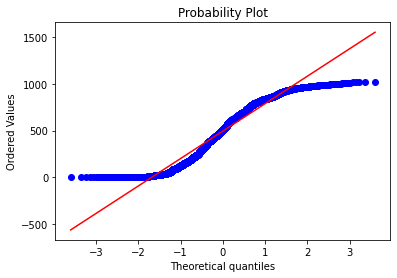

In [16]:
stats.probplot(y, dist="norm", plot=pylab)

In [17]:
x = np.arange(len(y))

In [18]:
x

array([   0,    1,    2, ..., 4375, 4376, 4377])

In [19]:
regr = OLS(y,x).fit()
print(regr.aic)

65093.50009940341


In [20]:
f = Fitter(y)

In [21]:
f.fit()

,sumsquare_error,aic,bic,kl_div
gausshyper,0.000015,1403.909201,-85275.313520,0.079345
powerlaw,0.000017,1397.787283,-84887.409950,0.083914
burr,0.000017,1402.777004,-84701.994994,0.062971
beta,0.000017,1404.901400,-84668.566379,0.086499
kappa3,0.000019,1398.617340,-84371.092847,0.063975


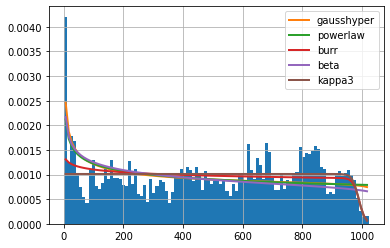

In [22]:
f.summary()

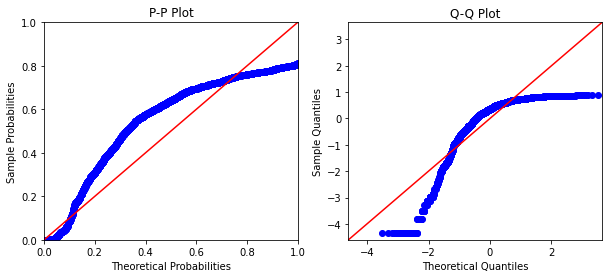

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
probplot = sm.ProbPlot(np.log(y), fit=True)
probplot.ppplot(line='45', ax=ax[0])
probplot.qqplot(line='45', ax=ax[1])
ax[0].set_title('P-P Plot')
ax[1].set_title('Q-Q Plot')
plt.show()

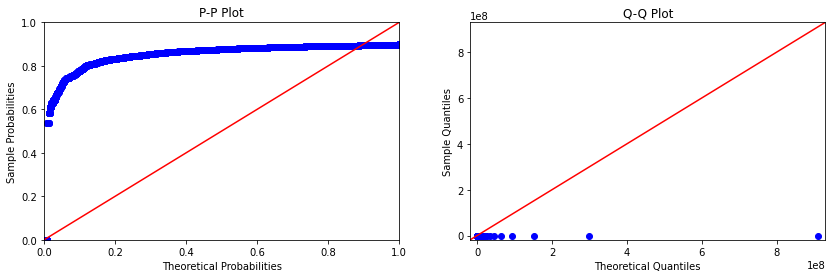

In [27]:
ig, ax = plt.subplots(1, 2, figsize=(14, 4))
probplot = sm.ProbPlot(y, dist=lognorm, fit=True)
probplot.ppplot(line='45', ax=ax[0])
probplot.qqplot(line='45', ax=ax[1])
ax[0].set_title('P-P Plot')
ax[1].set_title('Q-Q Plot')
plt.show()

In [29]:
scatter,loc,mean = lognorm.fit(y,floc=0) 

In [30]:
x_fit = np.linspace(x.min(),x.max(),100)
pdf_fitted = lognorm.pdf(x_fit,scatter,loc,mean)

In [31]:
x_fit

array([   0.        ,   44.21212121,   88.42424242,  132.63636364,
        176.84848485,  221.06060606,  265.27272727,  309.48484848,
        353.6969697 ,  397.90909091,  442.12121212,  486.33333333,
        530.54545455,  574.75757576,  618.96969697,  663.18181818,
        707.39393939,  751.60606061,  795.81818182,  840.03030303,
        884.24242424,  928.45454545,  972.66666667, 1016.87878788,
       1061.09090909, 1105.3030303 , 1149.51515152, 1193.72727273,
       1237.93939394, 1282.15151515, 1326.36363636, 1370.57575758,
       1414.78787879, 1459.        , 1503.21212121, 1547.42424242,
       1591.63636364, 1635.84848485, 1680.06060606, 1724.27272727,
       1768.48484848, 1812.6969697 , 1856.90909091, 1901.12121212,
       1945.33333333, 1989.54545455, 2033.75757576, 2077.96969697,
       2122.18181818, 2166.39393939, 2210.60606061, 2254.81818182,
       2299.03030303, 2343.24242424, 2387.45454545, 2431.66666667,
       2475.87878788, 2520.09090909, 2564.3030303 , 2608.51515

In [32]:
pdf_fitted

array([0.00000000e+00, 2.26300086e-03, 2.14448082e-03, 1.83064630e-03,
       1.54598236e-03, 1.31275544e-03, 1.12465558e-03, 9.72350482e-04,
       8.47874993e-04, 7.45072966e-04, 6.59296125e-04, 5.87037006e-04,
       5.25629302e-04, 4.73025196e-04, 4.27634395e-04, 3.88208285e-04,
       3.53756184e-04, 3.23484268e-04, 2.96750570e-04, 2.73031478e-04,
       2.51896504e-04, 2.32989114e-04, 2.16011989e-04, 2.00715612e-04,
       1.86889333e-04, 1.74354330e-04, 1.62958011e-04, 1.52569531e-04,
       1.43076183e-04, 1.34380466e-04, 1.26397694e-04, 1.19054026e-04,
       1.12284853e-04, 1.06033445e-04, 1.00249830e-04, 9.48898557e-05,
       8.99143981e-05, 8.52886907e-05, 8.09817588e-05, 7.69659361e-05,
       7.32164522e-05, 6.97110778e-05, 6.64298206e-05, 6.33546620e-05,
       6.04693296e-05, 5.77590993e-05, 5.52106231e-05, 5.28117789e-05,
       5.05515391e-05, 4.84198547e-05, 4.64075544e-05, 4.45062543e-05,
       4.27082797e-05, 4.10065942e-05, 3.93947386e-05, 3.78667745e-05,
      

1.325535985337163